In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('carInsurance_train.csv')
df_test = pd.read_csv('carInsurance_test.csv')
df_train.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [3]:
df_train.shape

(4000, 19)

In [4]:
df_test.shape

(1000, 19)

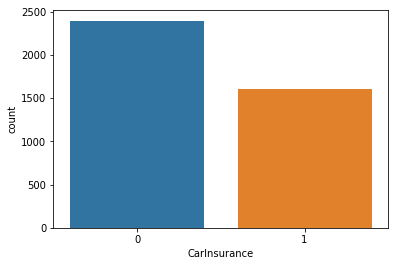

In [5]:
sns.countplot('CarInsurance',data=df_train)

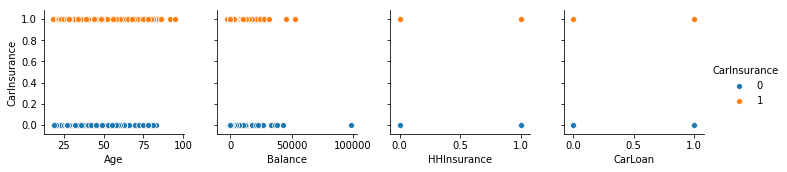

In [6]:
sns.pairplot(df_train, x_vars =['Age','Balance','HHInsurance','CarLoan'],y_vars='CarInsurance',hue='CarInsurance');

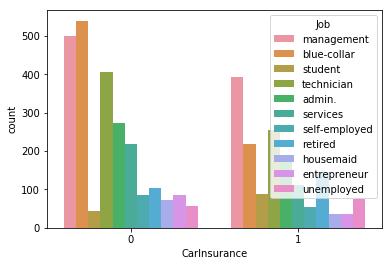

In [7]:
sns.countplot('CarInsurance',data=df_train,hue='Job');

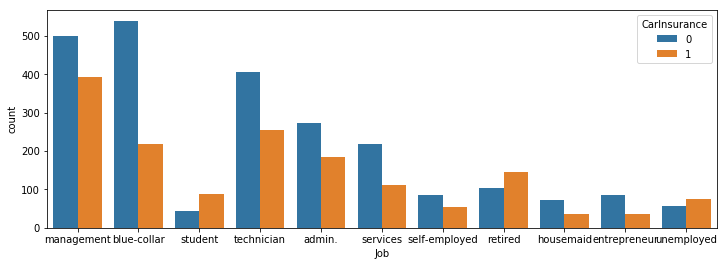

In [8]:
plt.figure(figsize=(12,4))
sns.countplot('Job',data=df_train,hue='CarInsurance');

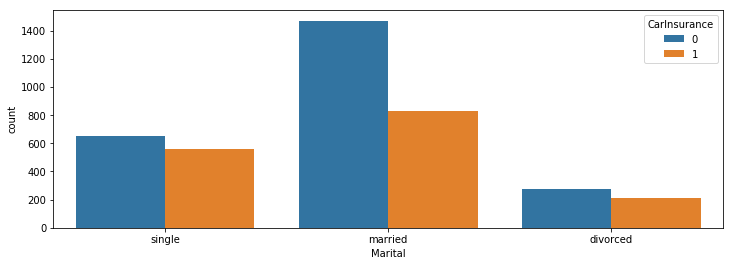

In [9]:
plt.figure(figsize=(12,4))
sns.countplot('Marital',data=df_train,hue='CarInsurance');

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


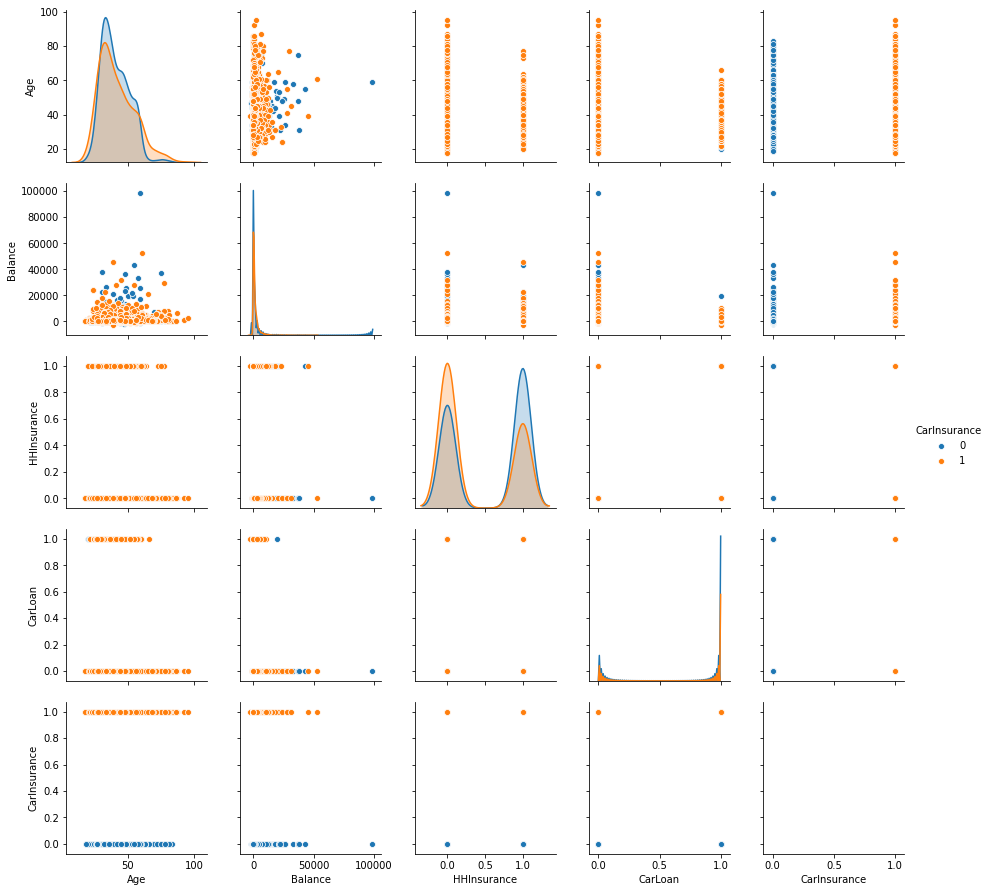

In [10]:
cols = ['Age','Balance','HHInsurance','CarLoan','CarInsurance']
sns.pairplot(df_train[cols],hue='CarInsurance')

In [11]:
df_train.drop(df_train[df_train['Balance']>60000].index,inplace=True)

In [12]:
merge_data = pd.concat([df_train,df_test],keys=('train','test'))

In [13]:
merge_data

Id  Age          Job  Marital  Education  Default  Balance  \
train 0       1   32   management   single   tertiary        0     1218   
      1       2   32  blue-collar  married    primary        0     1156   
      2       3   29   management   single   tertiary        0      637   
      3       4   25      student   single    primary        0      373   
      4       5   30   management  married   tertiary        0     2694   
...         ...  ...          ...      ...        ...      ...      ...   
test  995  4996   31       admin.   single  secondary        0      131   
      996  4997   52   management  married   tertiary        0     2635   
      997  4998   46   technician  married   tertiary        0     3009   
      998  4999   60      retired  married  secondary        0     7038   
      999  5000   28   management   single   tertiary        0      957   

           HHInsurance  CarLoan Communication  LastContactDay  \
train 0              1        0     telephone              28   
      1              1        0           NaN              26   
      2              1        0      cellular               3   
      3              1        0      cellular              11   
      4              0        0      cellular               3   
...                ...      ...           ...             ...   
test  995            1        0      cellular              15   
      996            0        0      cellular               6   
      997            0        0      cellular               4   
      998            0        0     telephone               7   
      999            0        0      cellular              25   

          LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 0                jan             2          -1             0      NaN   
      1                may             5          -1             0      NaN   
      2                jun             1         119             1  failure   
      3                may             2          -1             0      NaN   
      4                jun             1          -1             0      NaN   
...                    ...           ...         ...           ...      ...   
test  995              jun             1          -1             0      NaN   
      996              sep             1         108             8  success   
      997              aug             2          -1             0      NaN   
      998              oct             4          -1             0      NaN   
      999              may             2          -1             0      NaN   

          CallStart   CallEnd  CarInsurance  
train 0    13:45:20  13:46:30           0.0  
      1    14:49:03  14:52:08           0.0  
      2    16:30:24  16:36:04           1.0  
      3    12:06:43  12:20:22           1.0  
      4    14:35:44  14:38:56           0.0  
...             ...       ...           ...  
test  995  13:54:24  13:56:55           NaN  
      996  13:13:38  13:18:51           NaN  
      997  10:23:35  10:24:33           NaN  
      998  17:01:49  17:04:07           NaN  
      999  12:15:19  12:30:34           NaN  

[4999 rows x 19 columns]

In [14]:
merge_data.drop(['Id','CallStart','CallEnd'],axis=1,inplace=True)

In [15]:
merge_data_df = merge_data.copy()

In [16]:
merge_data_df.isnull().sum()

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CarInsurance        1000
dtype: int64

In [17]:
merge_data_df[merge_data_df['Outcome'].isnull()].describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.0,3798.0,3041.000000
mean,41.172722,0.016588,1414.180358,0.496051,0.140864,16.059768,2.798315,-1.0,0.0,0.343637
std,11.275358,0.127737,3032.231216,0.500050,0.347927,8.442643,3.292817,0.0,0.0,0.475000
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.0,0.0,0.000000
25%,32.000000,0.000000,83.000000,0.000000,0.000000,8.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,0.000000,482.500000,0.000000,0.000000,16.500000,2.000000,-1.0,0.0,0.000000
75%,49.000000,0.000000,1505.500000,1.000000,0.000000,22.000000,3.000000,-1.0,0.0,1.000000
max,95.000000,1.000000,45248.000000,1.000000,1.000000,31.000000,43.000000,-1.0,0.0,1.000000


In [18]:
merge_data_df['Outcome'].fillna('NoPrevContact',inplace=True) ## fill bcoz std is zero when we check other columns

In [19]:
merge_data_df[merge_data_df['Communication'].isnull()].describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,902.000000
mean,40.501336,0.018700,1165.617097,0.706144,0.143366,15.596616,2.688335,1.700801,0.020481,0.186253
std,9.502357,0.135523,2634.372948,0.455730,0.350602,8.496422,3.022335,39.179002,0.385255,0.389526
min,20.000000,0.000000,-1547.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,66.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,419.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1219.000000,1.000000,0.000000,23.000000,3.000000,-1.000000,0.000000,0.000000
max,61.000000,1.000000,45248.000000,1.000000,1.000000,31.000000,41.000000,779.000000,12.000000,1.000000


In [20]:
merge_data_df['Communication'].value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [21]:
merge_data_df['Communication'].fillna('cellular',inplace=True)

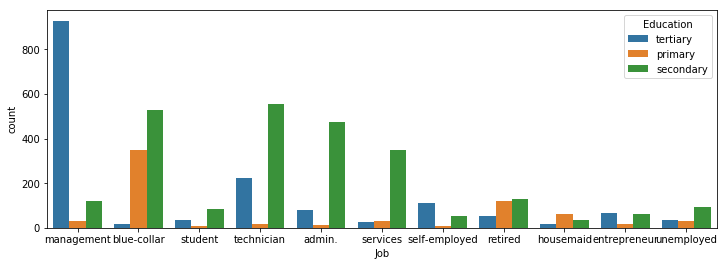

In [22]:
plt.figure(figsize=(12,4))
sns.countplot('Job',hue='Education',data=merge_data_df)

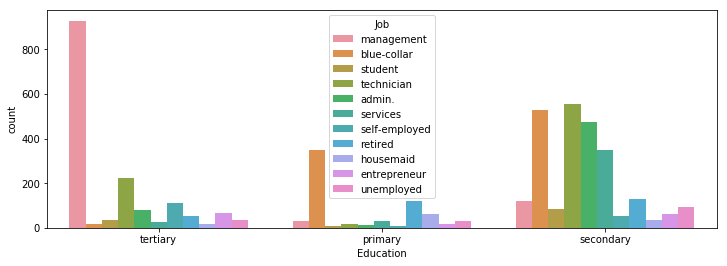

In [23]:
plt.figure(figsize=(12,4))
sns.countplot('Education',hue='Job',data=merge_data_df)

In [24]:
edu_map =merge_data_df.groupby('Job').Education.describe()['top']

In [31]:
edu_map

Job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
Name: top, dtype: object

In [25]:
edu_job =merge_data_df.groupby('Education').Job.describe()['top']

In [32]:
edu_job

Education
primary      blue-collar
secondary     technician
tertiary      management
Name: top, dtype: object

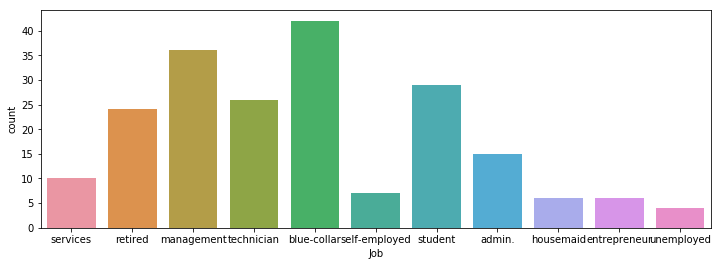

In [26]:
plt.figure(figsize=(12,4))
sns.countplot('Job',data=merge_data_df[merge_data_df['Education'].isnull()])

In [27]:
job_type = merge_data_df['Job'].value_counts().index

In [28]:
job_type

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [29]:
for j in job_type:
    merge_data_df.loc[(merge_data_df['Education'].isnull())&(merge_data_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

In [30]:
merge_data_df['Education'].isnull().sum() ## null show bcoz education nd job is nan is same row

11

In [31]:
merge_data_df.dropna(inplace=True)

In [32]:
df_num= merge_data_df[merge_data_df.select_dtypes(include=np.number).columns]

In [33]:
df_cat= merge_data_df[merge_data_df.select_dtypes(include='object').columns]

In [34]:
df_dummy= pd.get_dummies(df_cat)

In [35]:
df_new =pd.concat([df_num,df_dummy],axis=1)

In [36]:
df_new

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0      32        0     1218            1        0              28   
      1      32        0     1156            1        0              26   
      2      29        0      637            1        0               3   
      3      25        0      373            1        0              11   
      4      30        0     2694            0        0               3   
...         ...      ...      ...          ...      ...             ...   
      3995   28        0        0            1        0              25   
      3996   49        0      124            1        1              29   
      3997   27        0     -400            0        1               8   
      3998   36        0      658            1        0              29   
      3999   45        0      137            1        0               9   

            NoOfContacts  DaysPassed  PrevAttempts  CarInsurance  ...  \
train 0                2          -1             0           0.0  ...   
      1                5          -1             0           0.0  ...   
      2                1         119             1           1.0  ...   
      3                2          -1             0           1.0  ...   
      4                1          -1             0           0.0  ...   
...                  ...         ...           ...           ...  ...   
      3995             1          40             2           1.0  ...   
      3996            19          -1             0           0.0  ...   
      3997             1          -1             0           0.0  ...   
      3998             1         227             3           0.0  ...   
      3999             2          -1             0           0.0  ...   

            LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                        0                     0                     0   
      1                        0                     0                     1   
      2                        1                     0                     0   
      3                        0                     0                     1   
      4                        1                     0                     0   
...                          ...                   ...                   ...   
      3995                     0                     0                     1   
      3996                     0                     0                     0   
      3997                     0                     0                     0   
      3998                     0                     0                     0   
      3999                     0                     0                     1   

            LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                        0                     0                     0   
      1                        0                     0                     0   
      2                        0                     0                     0   
      3                        0                     0                     0   
      4                        0                     0                     0   
...                          ...                   ...                   ...   
      3995                     0                     0                     0   
      3996                     0                     0                     0   
      3997                     0                     0                     0   
      3998                     0                     0                     0   
      3999                     0                     0                     0   

            Outcome_NoPrevContact  Outcome_failure  Outcome_other  \
train 0                         1                0              0   
      1                         1                0              0   
      2                         0                1              0   
      3                         1   

In [37]:
data = df_new.loc[pd.IndexSlice[['train'],::]]

In [38]:
x = data.drop(['CarInsurance'],axis=1)

In [39]:
x.shape

(3980, 44)

In [40]:
y = data['CarInsurance']

In [41]:
y.shape

(3980,)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(x_train,y_train)

C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred = lr.predict(x_test)

In [48]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score

In [50]:
confusion_matrix(y_test,y_pred)

array([[609,  74],
       [297, 214]], dtype=int64)

In [51]:
(609+214)/(609+214+74+297)

0.6892797319932998

In [52]:
accuracy = accuracy_score(y_test,y_pred)

In [53]:
accuracy

0.6892797319932998

In [54]:
f1_score(y_test,y_pred)

0.5356695869837297

In [55]:
precision_score(y_test,y_pred)

0.7430555555555556

In [56]:
recall_score(y_test,y_pred)

0.4187866927592955

## ROC curve

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc = roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

In [59]:
roc_auc

0.7085065599275671

In [60]:
from sklearn.metrics import roc_curve

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])

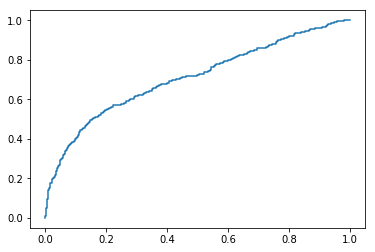

In [62]:
plt.plot(fpr,tpr)

In [63]:
lr.predict_proba(x_test)[:,1] # soft prediction and Exact probabilities of positive class

array([0.8371523 , 0.32205635, 0.05105675, ..., 0.20859952, 0.28587489,
       0.26034407])

In [64]:
lr.predict(x_test) # Hard prediction

array([1., 0., 0., ..., 0., 0., 0.])

## change the threshold value

In [65]:
threshold = 0.31
y_pred =(lr.predict_proba(x_test)[:,1]>threshold).astype(int)

In [66]:
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [67]:
type(pd.Series(thresholds))
fpr_series = pd.Series(fpr)
tpr_series = pd.Series(tpr)
thresholds_series = pd.Series(thresholds)

In [68]:
df1 = pd.concat([fpr_series,tpr_series,thresholds_series],axis=1,keys=['FPR','TPR','THRESHOLD'])
df1.head()

,FPR,TPR,THRESHOLD
0,0.000000,0.000000,1.982550
1,0.000000,0.001957,0.982550
2,0.000000,0.009785,0.976019
3,0.001464,0.009785,0.975524
4,0.001464,0.046967,0.949540


In [69]:
df1.loc[(df1['TPR']>.7)&(df1['FPR']>.4)]

,FPR,TPR,THRESHOLD
300,0.430454,0.700587,0.315425
301,0.434846,0.700587,0.314335
302,0.434846,0.704501,0.314055
303,0.443631,0.704501,0.311224
304,0.443631,0.706458,0.311011
...,...,...,...
515,0.979502,0.996086,0.125782
516,0.979502,0.998043,0.124736
517,0.980966,0.998043,0.124130
518,0.980966,1.000000,0.122813


In [70]:
threshold = 0.436984
y_pred =(lr.predict_proba(x_test)[:,1]>threshold).astype(int)

In [71]:
accuracy_score(y_test,y_pred)

0.6976549413735343

In [72]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

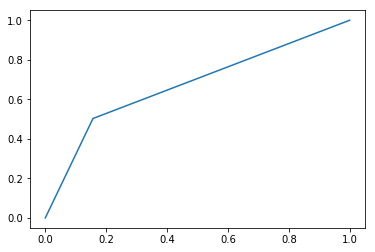

In [73]:
plt.plot(fpr,tpr)

In [74]:
accuracy_score(y_test,y_pred)

0.6976549413735343

In [75]:

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(lr.predict_proba(x_test)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
0,2,0.572027
1,1,0.572027
2,0,0.427973


In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [85]:
si = SimpleImputer()
lr = LogisticRegression()

In [80]:
from sklearn.model_selection import cross_val_score

In [86]:
pipe = make_pipeline(si, lr)

In [87]:
pipe.fit(x, y)


C:\Users\Ashish\Anaconda3\envs\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [89]:
a=pipe.predict(x_test)


In [90]:
accuracy_score(y_test,a)

0.7043551088777219